# Домашняя работа по дисциплине "Классическое машинное обучение" 

## Практическое задание №4

Работу выполнил студент Груданов Николай.

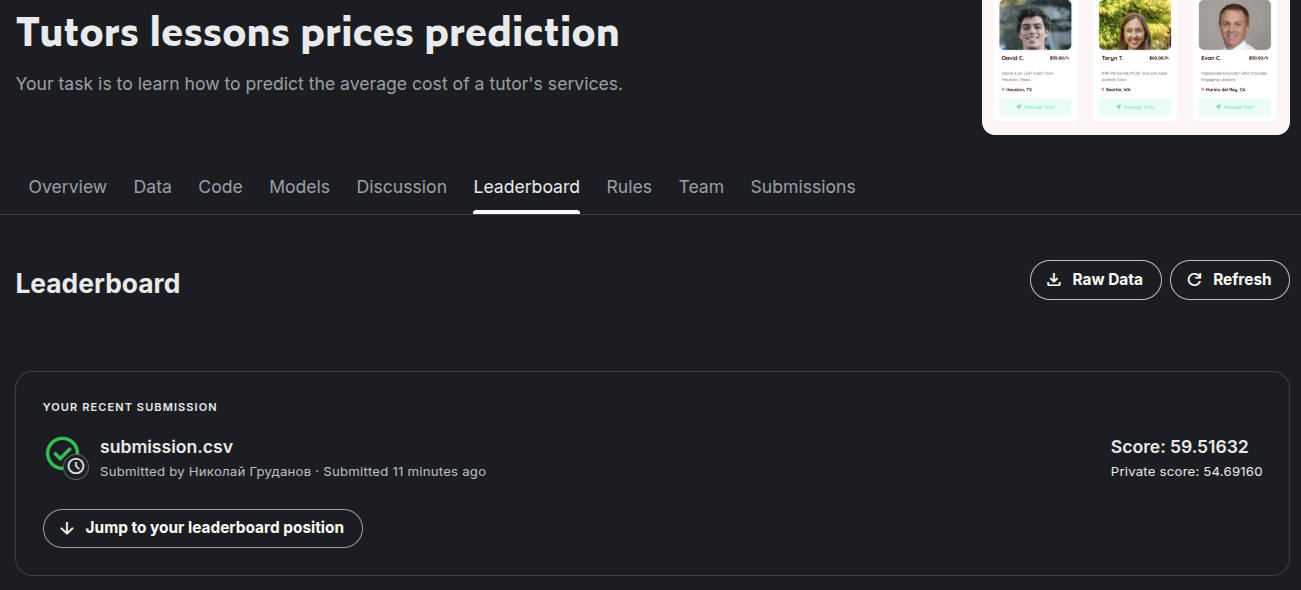

Импорт библиотек и загрузка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Загрузка датасетов
train = pd.read_excel('./tutors-lessons-prices-prediction/train.xlsx')
test = pd.read_excel('./tutors-lessons-prices-prediction/test.xlsx')


Первичный анализ данных

In [4]:
train.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


In [5]:
test.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories
0,0,matematika,Репетитор по математике Тихонова Наталья Бори...,"['Школьная программа', 'Подготовка к ЕГЭ', 'Ан...",4,13,Дистанционное убучение по Skype с прим...,NaN,Петрозаводский государственный университет,"Год окончания: 1981, Факультет: физико-матема...",...,NaN,Частный преподаватель,26 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,1,matematika,Репетитор по математике Худайбердина Милана Р...,"['Школьная программа', 'Математический анализ'...",0,0,Буду рада помочь в освоении дисциплин ...,NaN,"Национальный исследовательский университет ""В...","Год окончания: 2022, Факультет: Московский ин...",...,NaN,Студент,4 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
2,2,matematika,Репетитор по математике Епихина Елена Вячесла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0,0,Преподаватель высшей квалификационный ...,Репетитор не предоставил информаци...,"Тамбовский ордена ""Знак Почёта"" государственн...","Год окончания: 1987, Факультет: Математика, С...",...,NaN,"Университетский преподаватель, Школьный препо...",36 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."
3,3,matematika,Репетитор по математике Касаткин Денис Евгень...,"['Школьная программа', 'Подготовка к ОГЭ', 'Hi...",4,11,"Объясняю ровно столько, сколько надо. ...",NaN,Тюменский государственный университет,"Год окончания: 2022, Факультет: факультет меж...",...,NaN,Студент,3 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4,4,informatika,Репетитор по информатике Логвинов Артём Алекса...,['Подготовка к ЕГЭ'],0,0,"Подготовлю к ЕГЭ, уроки через любую уд...",Репетитор не предоставил информаци...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Программная и...",...,NaN,Студент,1 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."


In [7]:
# Информация о данных и пропусках
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


In [8]:
train.isnull().sum()

Unnamed: 0             0
предмет                0
ФИО                    0
tutor_head_tags        0
tutor_rating         589
tutor_reviews          0
description            1
experience_desc     2377
Education_1            0
Desc_Education_1      76
Education_2         3767
Desc_Education_2    3771
Education_3         4442
Desc_Education_3    4443
Education_4         4532
Desc_Education_4    4532
Ученая степень 1    4472
Ученое звание 1     4513
status                13
experience            25
Desc_Education_5    4545
Desc_Education_6    4547
Education_5         4545
Education_6         4547
Ученая степень 2    4547
Ученое звание 2     4547
categories             0
mean_price             0
dtype: int64

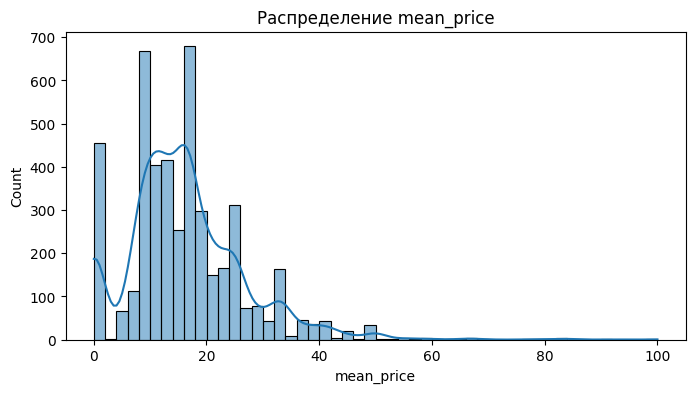

In [9]:
# Распределение целевой переменной
plt.figure(figsize=(8, 4))
sns.histplot(train['mean_price'], bins=50, kde=True)
plt.title('Распределение mean_price')
plt.xlabel('mean_price')
plt.ylabel('Count')
plt.show()


In [17]:
# Уникальные значения признаков
print('Уникальные значения предмет:\n', train['предмет'].unique())
print('='*90)
print('Уникальные значения status:\n', train['status'].unique())
print('='*90)
print('Уникальные значения experience:\n', train['experience'].unique())

Уникальные значения предмет:
 ['matematika' 'informatika']
Уникальные значения status:
 [' Университетский преподаватель' ' Школьный преподаватель'
 ' Частный преподаватель' ' Студент'
 ' Аспирант или ординатор очной формы обучения' nan
 ' Университетский преподаватель, Школьный преподаватель'
 ' Аспирант или ординатор очной формы обучения, Частный преподаватель'
 ' Частный преподаватель, Студент'
 ' Университетский преподаватель, Аспирант или ординатор очной формы обучения'
 ' Школьный преподаватель, Аспирант или ординатор очной формы обучения']
Уникальные значения experience:
 [' 31 год ' ' 8 лет ' ' 11 лет ' ' 5 лет ' ' 19 лет ' ' 7 лет ' ' 27 лет '
 ' 9 лет ' ' 38 лет ' ' 28 лет ' ' 17 лет ' ' 6 лет ' ' 13 лет '
 ' 45 лет ' ' 4 года ' ' 3 года ' ' 10 лет ' ' 2 года ' ' 14 лет '
 ' 20 лет ' ' 18 лет ' ' 32 года ' ' 16 лет ' ' 21 год ' ' 15 лет '
 ' 12 лет ' ' 1 год ' ' 24 года ' ' 29 лет ' ' 22 года ' ' 39 лет '
 ' 23 года ' ' 25 лет ' ' 34 года ' nan ' 33 года ' ' 43 года ' ' 36 ле

Предобработка данных

In [18]:
# Заполнение пропусков
for col in ['tutor_rating', 'tutor_reviews']:
    train[col] = train[col].fillna(train[col].median())
    test[col] = test[col].fillna(train[col].median())

for col in ['experience', 'status']:
    train[col] = train[col].fillna('unknown')
    test[col] = test[col].fillna('unknown')

for col in ['description']:
    train[col] = train[col].fillna('')
    test[col] = test[col].fillna('')


Feature Engineering

In [19]:
# Функция для извлечения лет опыта
def extract_years(x):
    """
    Функция извлекает год из входного значения.

    Параметры:
    x (str, int, float): Входное значение, из которого нужно извлечь год.

    Возвращает:
    int: Год, извлеченный из входного значения. Если входное значение является строкой, функция извлекает все цифры из строки и возвращает их как целое число. Если входное значение является числом, функция просто возвращает его. Если входное значение является пустым или не содержит цифр, функция возвращает 0.
    """
    if pd.isnull(x):
        return 0
    if isinstance(x, str):
        digits = "".join([c for c in x if c.isdigit()])
        return int(digits) if digits else 0
    return int(x)


# Признаки опыта
train["experience_years"] = train["experience"].apply(extract_years)
test["experience_years"] = test["experience"].apply(extract_years)

# Длина описания
train["desc_len"] = train["description"].apply(len)
test["desc_len"] = test["description"].apply(len)

# Количество тегов
train["n_tags"] = train["tutor_head_tags"].apply(
    lambda x: len(eval(x)) if pd.notnull(x) else 0
)
test["n_tags"] = test["tutor_head_tags"].apply(
    lambda x: len(eval(x)) if pd.notnull(x) else 0
)

# Количество категорий
train["n_categories"] = train["categories"].apply(
    lambda x: len(eval(x)) if pd.notnull(x) else 0
)
test["n_categories"] = test["categories"].apply(
    lambda x: len(eval(x)) if pd.notnull(x) else 0
)


In [20]:
# Объединяем train и test для корректного кодирования
all_status = pd.concat([train['status'], test['status']]).astype(str)
le_status = LabelEncoder()
le_status.fit(all_status)
train['status_enc'] = le_status.transform(train['status'].astype(str))
test['status_enc'] = le_status.transform(test['status'].astype(str))

all_subjects = pd.concat([train['предмет'], test['предмет']]).astype(str)
le_subject = LabelEncoder()
le_subject.fit(all_subjects)
train['subject_enc'] = le_subject.transform(train['предмет'].astype(str))
test['subject_enc'] = le_subject.transform(test['предмет'].astype(str))


Формирование финального набора признаков

In [21]:
features = [
    'tutor_rating', 'tutor_reviews', 'experience_years',
    'subject_enc', 'status_enc', 'desc_len', 'n_tags', 'n_categories'
]

X = train[features]
y = train['mean_price'].astype(float)
X_test = test[features]


Масштабирование признаков

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)


Обучение и оценка моделей

In [23]:
# Разделим train для локальной оценки
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Базовая модель RandomForest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print('MAE на валидации:', mean_absolute_error(y_val, y_pred))


MAE на валидации: 6.418669209949411


Подбор гиперпараметров

GridSearchCV подбирает оптимальные параметры для RandomForest по метрике MAE

In [24]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)
print('Лучшие параметры:', grid.best_params_)
print('MAE на валидации:', mean_absolute_error(y_val, grid.predict(X_val)))


Лучшие параметры: {'max_depth': 10, 'n_estimators': 200}
MAE на валидации: 6.3898733799400205


Финальное обучение и предсказание

In [25]:
# Обучаем финальную модель на всех данных
final_model = RandomForestRegressor(**grid.best_params_, random_state=42)
final_model.fit(X_scaled, y)

# Предсказания для тестового набора
preds = final_model.predict(X_test_scaled)

# Формирование submission для Kaggle
submission = pd.DataFrame({'index': test['Unnamed: 0'], 'mean_price': preds})
submission.to_csv('submission.csv', index=False)
